# generate Image lines in Pillow with pixels

In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL \
    import Image

from IPython.display \
    import display

In [3]:
width: int = 500
height: int = 500

image = None
pixel_access = None

In [4]:
def reset_canvas() -> None:
    global image, width, height
    image = Image.new('RGB', (width, height), color="white")

    setup_pixel_access()


def setup_pixel_access() -> None:
    global image, pixel_access
    pixel_access = image.load()


In [5]:
reset_canvas()

In [6]:
def get_pixel_at(x: int, y: int) -> list:
    global pixel_access
    return pixel_access[x, y]

def set_pixel_at(
        x: int, 
        y: int, 
        color: list
) -> None:
    global pixel_access
    pixel_access[x, y] = color

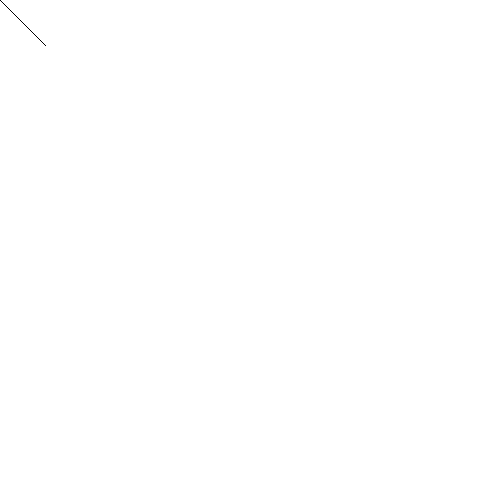

In [7]:
reset_canvas()

def draw_line(
        A: list, 
        B: list, 
        color: list
) -> None:
    ax, ay = A
    bx, by = B

    decide_drawing(
        ax, 
        ay, 
        bx, 
        by, 
        color=color
    )

def decide_drawing(
    ax: int, 
    ay: int, 
    bx: int, 
    by: int, 
    color: list
) -> None:
    if ax < bx:
        draw_line_left_to_right(
            ax, 
            ay, 
            bx, 
            by, 
            color
        )
    else:
        draw_line_right_to_left(
            ax, 
            ay, 
            bx, 
            by, 
            color=color
        )

def draw_line_left_to_right(
        ax: int, 
        ay: int, 
        bx: int, 
        by: int, 
        color: list
    ) -> None:
    position_on_y = ay
    boundary_y: int = (by + 1)

    for index_position in range(
        ax, 
        bx + 1
    ):
        set_pixel_at(
            index_position, 
            position_on_y, 
            color=color
        )

        if position_on_y > boundary_y:
            break
    
        position_on_y = position_on_y + 1        

def draw_line_right_to_left(
        ax: int, 
        ay: int, 
        bx: int, 
        by: int, 
        color: list
    ) -> None:
    position_on_y = ay
    boundary_y: int = (by)

    traverse = reversed(range(bx, (ax + 1)))

    for index_position in traverse:
        if position_on_y < boundary_y:
            break

        set_pixel_at(
            index_position, 
            position_on_y, 
            color=color
        )
        position_on_y = position_on_y - 1


draw_line(A=(45, 45), B=(0, 0), color=(0, 0, 0))

display(image)